In [11]:
pip install antspyx

     -------------------------------------- 186.0/186.0 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 64.4/64.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib nilearn


Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x279061e4580>

D:\Anaconda\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedWriter name=4>

D:\Anaconda\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedReader name=5>

D:\Anaconda\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedReader name=6>



In [7]:
pip install nibabel SimpleITK


D:\Anaconda\lib\threading.py:957: ResourceWarning:

unclosed file <_io.BufferedWriter name=4>

D:\Anaconda\lib\threading.py:957: ResourceWarning:

unclosed file <_io.BufferedReader name=5>

D:\Anaconda\lib\threading.py:957: ResourceWarning:

unclosed file <_io.BufferedReader name=6>

sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x279054bb7c0>



In [1]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

In [2]:
brain_vol = nib.load("D:\Parkinson\data_nifti\merged_pd_Anon_20220124075007_3.nii.gz")

# What is the type of this object?
type(brain_vol)

nibabel.nifti1.Nifti1Image

In [3]:
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.3 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3;Time=75419.992;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -95.5
qoffset_y       : -134.83133
qoffset_z       : -170.3735
srow

In [4]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)

numpy.ndarray

In [5]:
brain_vol_data.shape

(192, 256, 256)

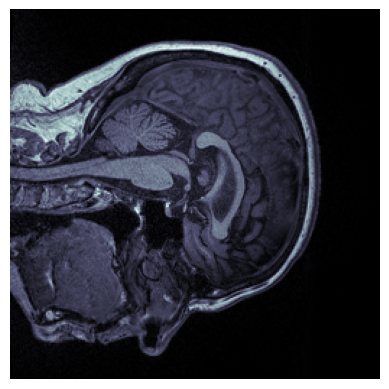

In [6]:
plt.imshow(brain_vol_data[96], cmap='bone')
plt.axis('off')
plt.show()

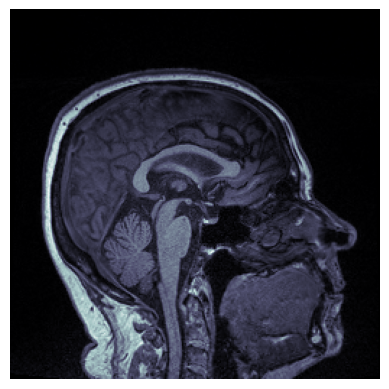

In [7]:
plt.imshow(ndi.rotate(brain_vol_data[96], 90), cmap='bone')
plt.axis('off')
plt.show()

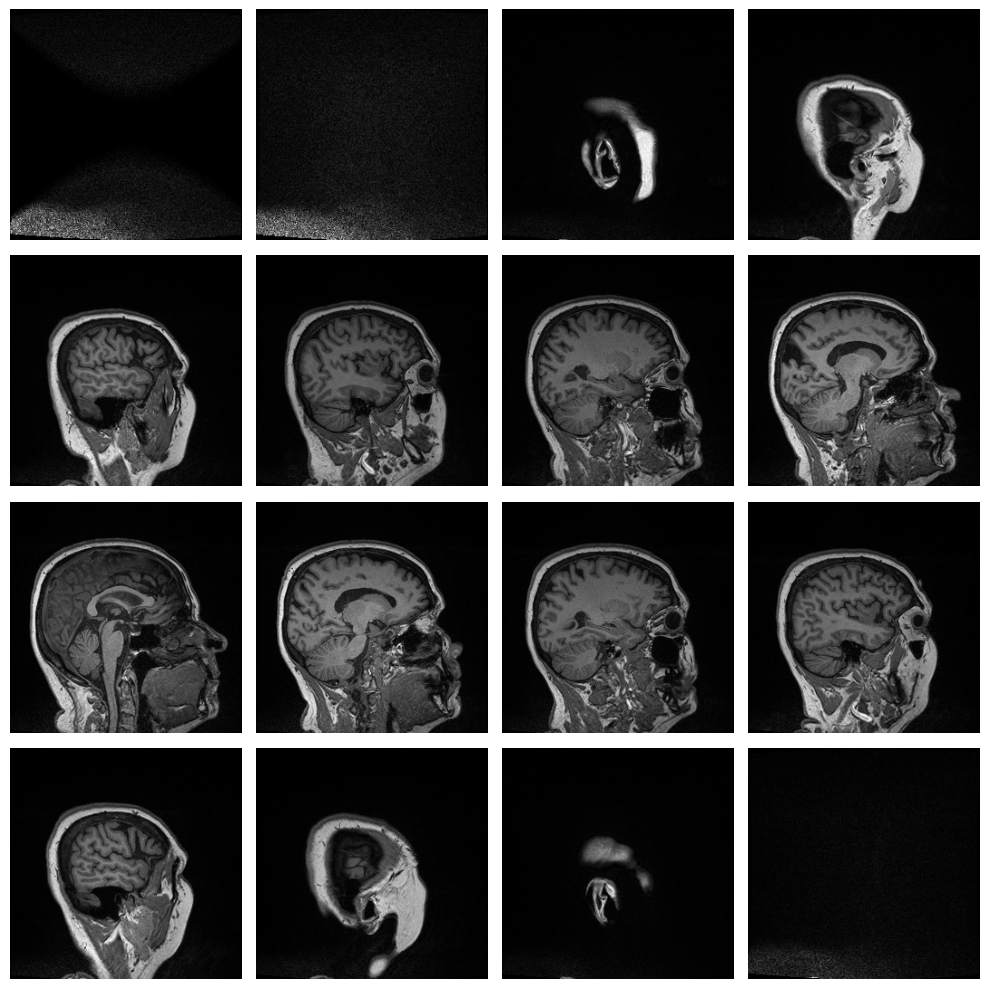

In [8]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

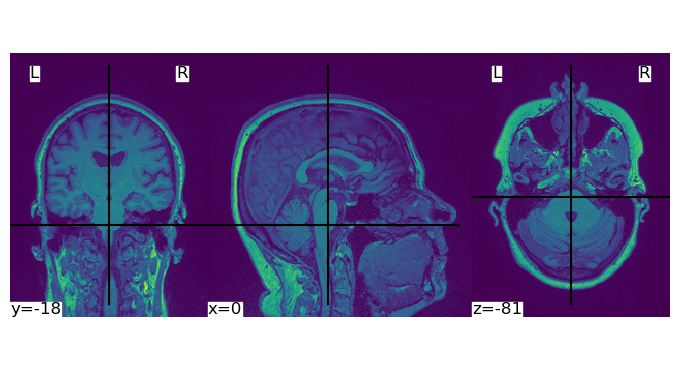

In [9]:
from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()

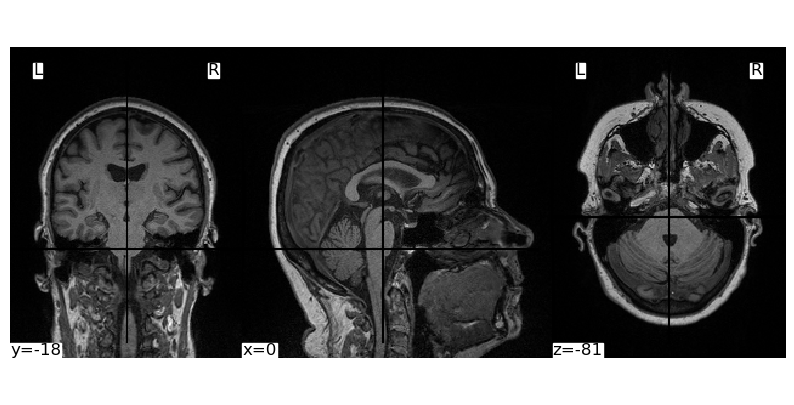

In [10]:
from nilearn import plotting

fig, ax = plt.subplots(figsize=[10, 5])
plotting.plot_img(brain_vol, cmap='gray', axes=ax)
plt.show()

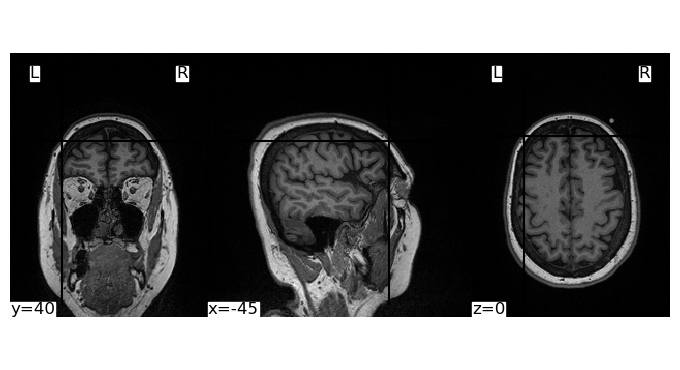

In [11]:
plotting.plot_img(brain_vol, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

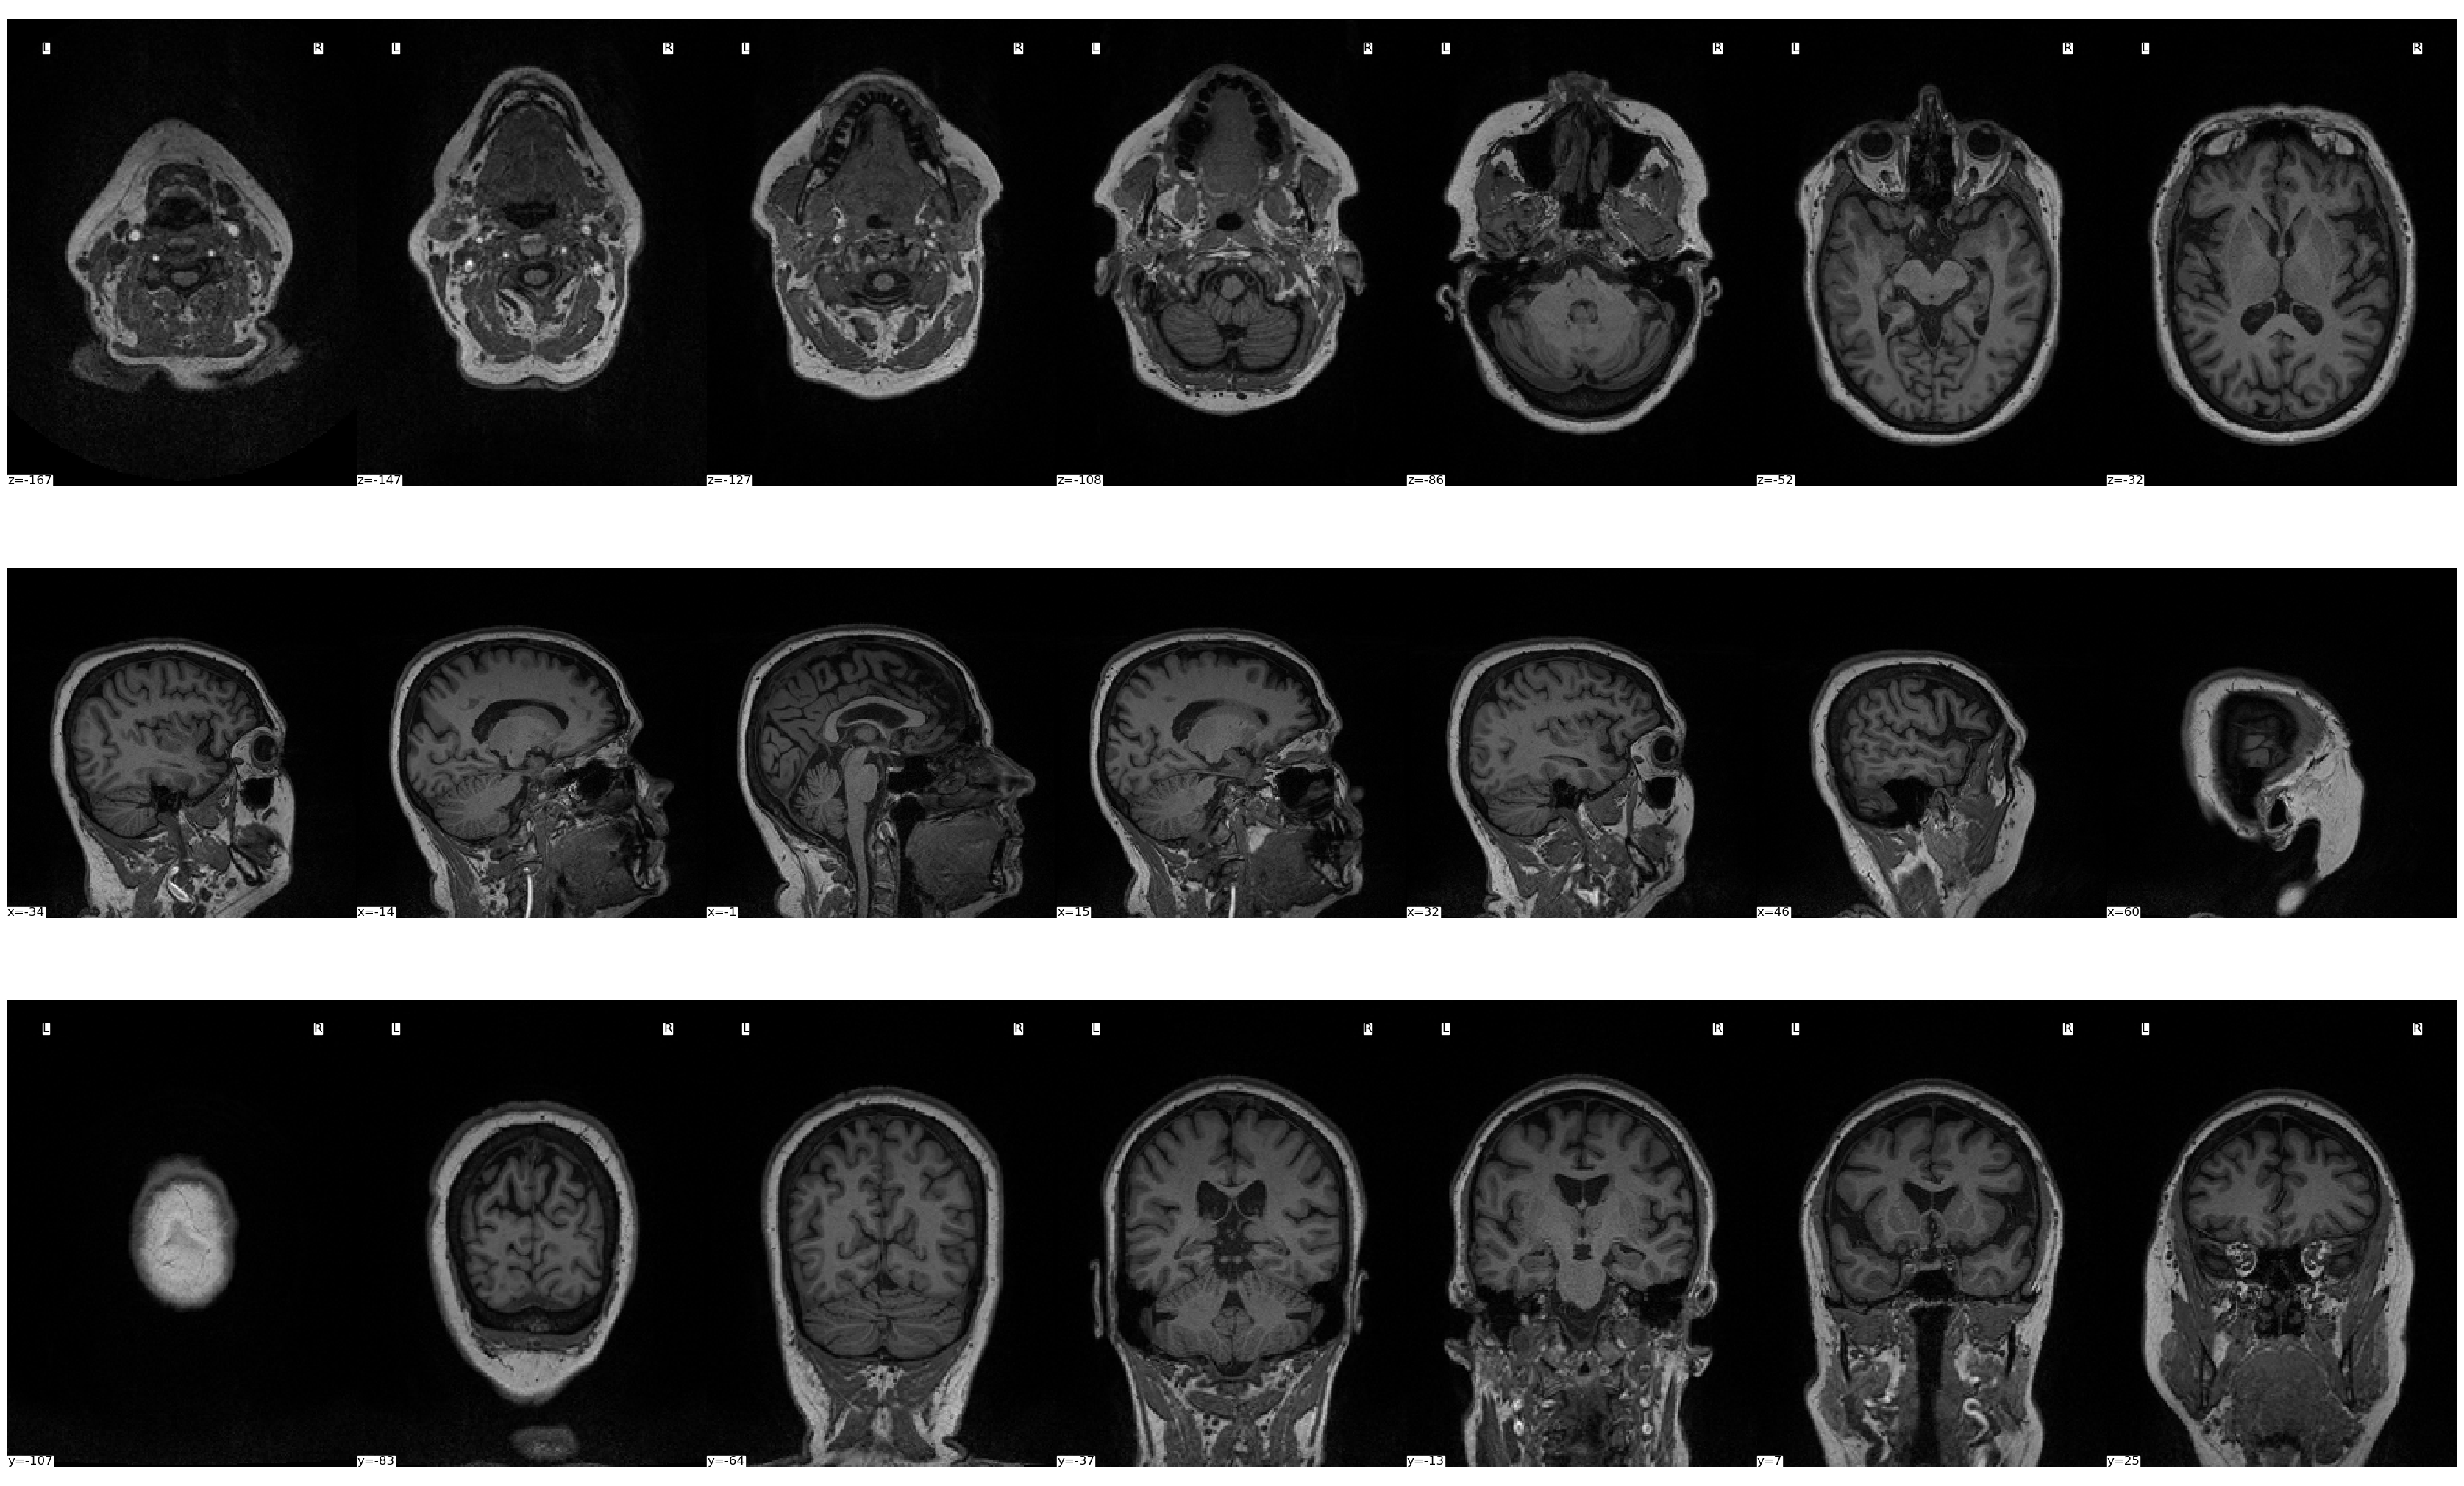

In [12]:
plotting.plot_img(brain_vol, display_mode='mosaic', cmap='gray')
plt.show()

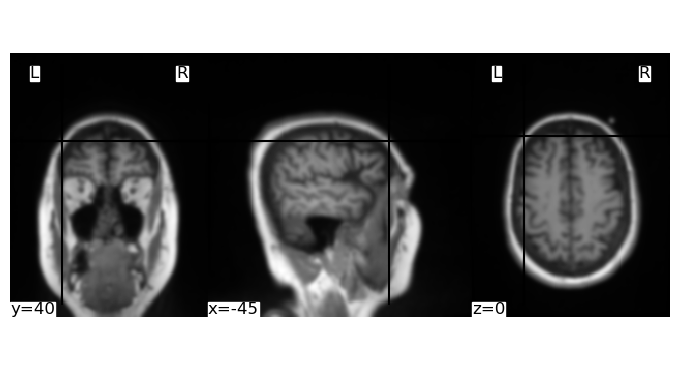

In [13]:
from nilearn import image

fwhm = 4

brain_vol_smth = image.smooth_img(brain_vol, fwhm)
plotting.plot_img(brain_vol_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

In [2]:
import ants

# Load your NIfTI images
fixed_image_path = "D:\Parkinson\ch2.nii"
moving_image_path = "D:\Parkinson\data_nifti\merged_pd_Anon_20220124075007_3.nii.gz"

# Read images
fixed_image = ants.image_read(fixed_image_path)
moving_image = ants.image_read(moving_image_path)

# Perform affine registration
affine_transform = ants.registration(fixed=fixed_image, moving=moving_image, type_of_transform='Affine')
affine_registered_image = ants.apply_transforms(fixed=fixed_image, moving=moving_image, transformlist=affine_transform['fwdtransforms'])

# Perform SyN (deformable) registration
syn_transform = ants.registration(fixed=fixed_image, moving=moving_image, type_of_transform='SyN')
syn_registered_image = ants.apply_transforms(fixed=fixed_image, moving=moving_image, transformlist=syn_transform['fwdtransforms'])

# Save the registered images
ants.image_write(affine_registered_image, "D:\Parkinson\affine_registered_image.nii.gz")
ants.image_write(syn_registered_image, "D:\Parkinson\syn_registered_image.nii.gz")


<>:6: DeprecationWarning:

invalid escape sequence '\P'

<>:6: DeprecationWarning:

invalid escape sequence '\P'

C:\Users\Niyonika Gaur\AppData\Local\Temp\ipykernel_7840\1881966600.py:6: DeprecationWarning:

invalid escape sequence '\P'



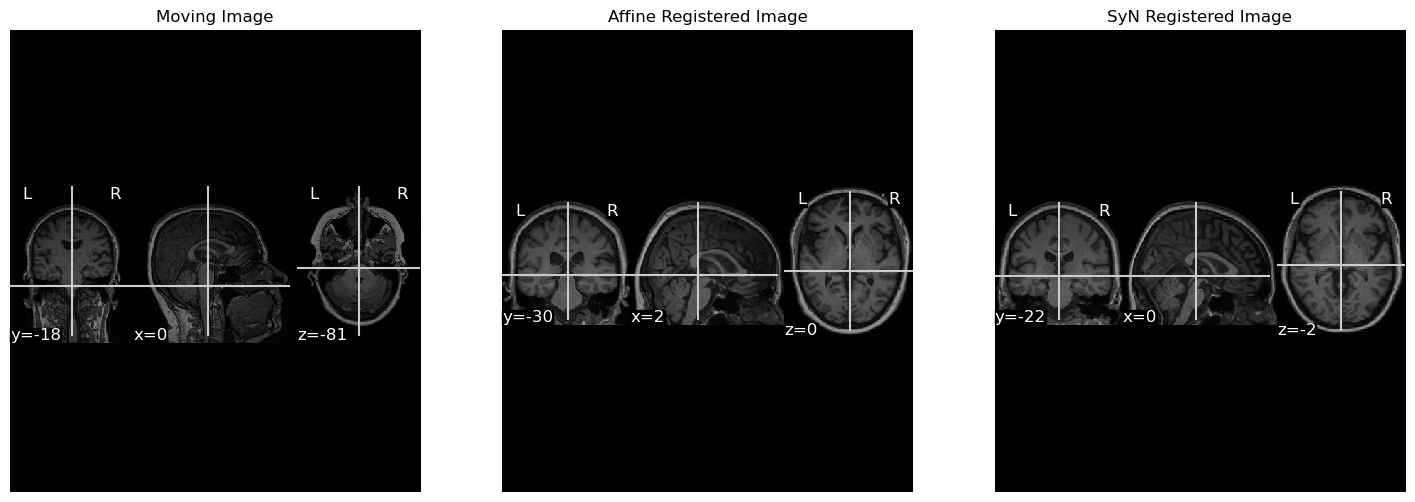

In [6]:
import ants
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

moving_image_path ="D:\Parkinson\data_nifti\merged_pd_Anon_20220124075007_3.nii.gz"
affine_registered_image_path = "D:/Parkinson/affine_registered_image.nii.gz"
syn_registered_image_path = "D:/Parkinson/syn_registered_image.nii.gz"

# Read images
moving_image = ants.image_read(moving_image_path)
affine_registered_image = ants.image_read(affine_registered_image_path)
syn_registered_image = ants.image_read(syn_registered_image_path)

# Display the images using nilearn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Moving image
plotting.plot_anat(nib.load(moving_image_path), display_mode='ortho', cut_coords=None, axes=axes[0])
axes[0].set_title('Moving Image')

# Affine registered image
plotting.plot_anat(nib.load(affine_registered_image_path), display_mode='ortho', cut_coords=None, axes=axes[1])
axes[1].set_title('Affine Registered Image')

# SyN registered image
plotting.plot_anat(nib.load(syn_registered_image_path), display_mode='ortho', cut_coords=None, axes=axes[2])
axes[2].set_title('SyN Registered Image')

plt.show()


In [8]:
import nibabel as nib
import SimpleITK as sitk

# Define paths to your original images
affine_registered_image_path = "affine_registered_image.nii.gz"
syn_registered_image_path = "syn_registered_image.nii.gz"

# Load the images using nibabel
affine_registered_image = nib.load(affine_registered_image_path)
syn_registered_image = nib.load(syn_registered_image_path)

# Convert nibabel images to SimpleITK images
affine_registered_sitk = sitk.GetImageFromArray(affine_registered_image.get_fdata())
syn_registered_sitk = sitk.GetImageFromArray(syn_registered_image.get_fdata())

# Apply N4ITK bias field correction
corrector = sitk.N4BiasFieldCorrectionImageFilter()
affine_corrected_sitk = corrector.Execute(affine_registered_sitk)
syn_corrected_sitk = corrector.Execute(syn_registered_sitk)

# Convert SimpleITK images back to nibabel images
affine_corrected_image = nib.Nifti1Image(sitk.GetArrayFromImage(affine_corrected_sitk), affine_registered_image.affine)
syn_corrected_image = nib.Nifti1Image(sitk.GetArrayFromImage(syn_corrected_sitk), syn_registered_image.affine)

# Save the corrected images
affine_corrected_image.to_filename("affine_corrected_image.nii.gz")
syn_corrected_image.to_filename("syn_corrected_image.nii.gz")


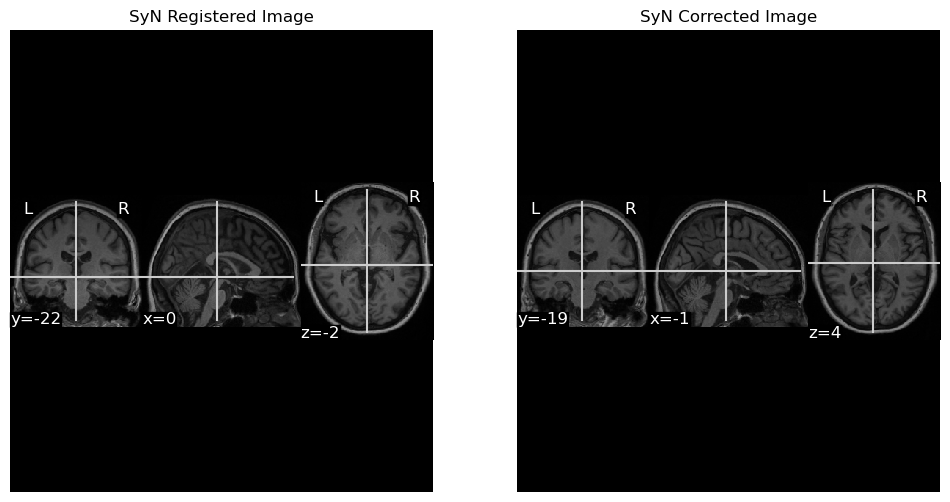

In [5]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt

# Load the SyN registered and SyN corrected images
syn_registered_path = "syn_registered_image.nii.gz"
syn_corrected_path = "syn_corrected_image.nii.gz"

syn_registered_image = nib.load(syn_registered_path)
syn_corrected_image = nib.load(syn_corrected_path)

# Display the images in ortho view using nilearn.plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# SyN registered image
plotting.plot_anat(syn_registered_image, display_mode='ortho', cut_coords=None, axes=axes[0])
axes[0].set_title('SyN Registered Image')

# SyN corrected image
plotting.plot_anat(syn_corrected_image, display_mode='ortho', cut_coords=None, axes=axes[1])
axes[1].set_title('SyN Corrected Image')

plt.show()


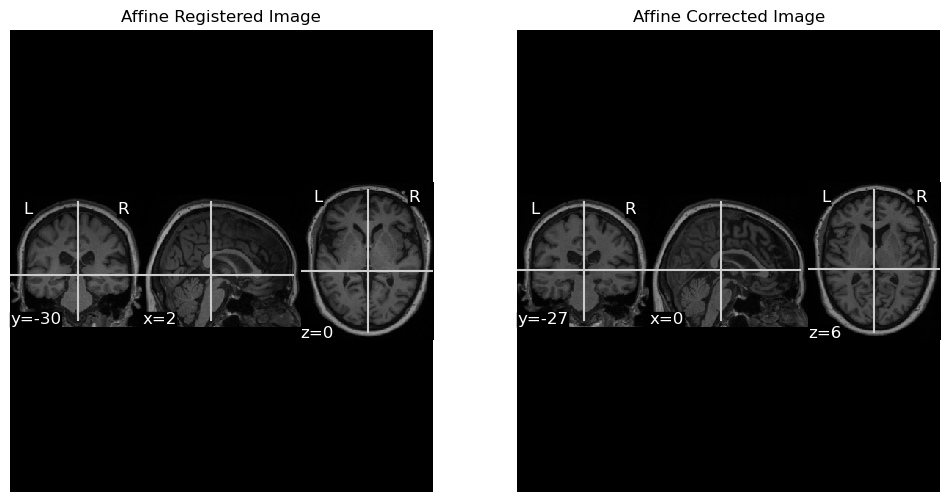

In [6]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt

# Load the Affine registered and Affine corrected images
affine_registered_path = "affine_registered_image.nii.gz"
affine_corrected_path = "affine_corrected_image.nii.gz"

affine_registered_image = nib.load(affine_registered_path)
affine_corrected_image = nib.load(affine_corrected_path)

# Display the images in ortho view using nilearn.plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Affine registered image
plotting.plot_anat(affine_registered_image, display_mode='ortho', cut_coords=None, axes=axes[0])
axes[0].set_title('Affine Registered Image')

# Affine corrected image
plotting.plot_anat(affine_corrected_image, display_mode='ortho', cut_coords=None, axes=axes[1])
axes[1].set_title('Affine Corrected Image')

plt.show()


In [9]:
import os
import subprocess

# Specify the paths to the corrected images
affine_corrected_path = "affine_corrected_image.nii.gz"
syn_corrected_path = "syn_corrected_image.nii.gz"

# Output paths for the skull-stripped images
affine_skull_stripped_path = "affine_skull_stripped.nii.gz"
syn_skull_stripped_path = "syn_skull_stripped.nii.gz"

# ANTs skull stripping commands
affine_ants_bet_command = f"antsBrainExtraction.sh -d 3 -a {affine_corrected_path} -e 'D:\\Parkinson\\ch2better.nii' -m {affine_skull_stripped_path} -o {affine_skull_stripped_path.replace('.nii.gz', '_brain')}"
syn_ants_bet_command = f"antsBrainExtraction.sh -d 3 -a {syn_corrected_path} -e 'D:\\Parkinson\\ch2better.nii' -m {syn_skull_stripped_path} -o {syn_skull_stripped_path.replace('.nii.gz', '_brain')}"

# Run ANTs skull stripping using subprocess
subprocess.run(affine_ants_bet_command, shell=True)
subprocess.run(syn_ants_bet_command, shell=True)


CompletedProcess(args="antsBrainExtraction.sh -d 3 -a syn_corrected_image.nii.gz -e 'D:\\Parkinson\\ch2better.nii' -m syn_skull_stripped.nii.gz -o syn_skull_stripped_brain", returncode=0)

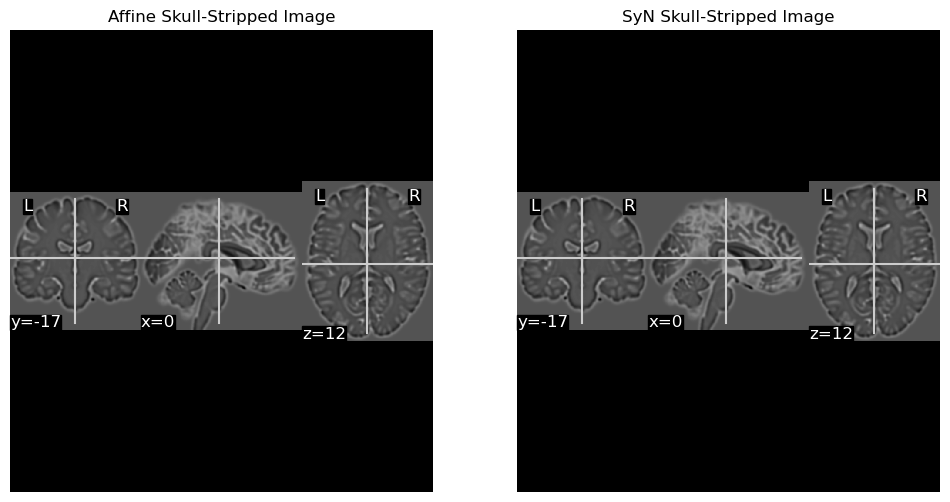

In [11]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt

# Load the skull-stripped images
affine_skull_stripped_image = nib.load("affine_skull_stripped_brainBrainExtractionTemplateLaplacian.nii.gz")
syn_skull_stripped_image = nib.load("syn_skull_stripped_brainBrainExtractionTemplateLaplacian.nii.gz")

# Display the skull-stripped images in ortho view using nilearn.plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Affine skull-stripped image
plotting.plot_anat(affine_skull_stripped_image, display_mode='ortho', cut_coords=None, axes=axes[0])
axes[0].set_title('Affine Skull-Stripped Image')

# SyN skull-stripped image
plotting.plot_anat(syn_skull_stripped_image, display_mode='ortho', cut_coords=None, axes=axes[1])
axes[1].set_title('SyN Skull-Stripped Image')

plt.show()


C:\Users\Niyonika Gaur\AppData\Local\Temp\ipykernel_3664\1715444520.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


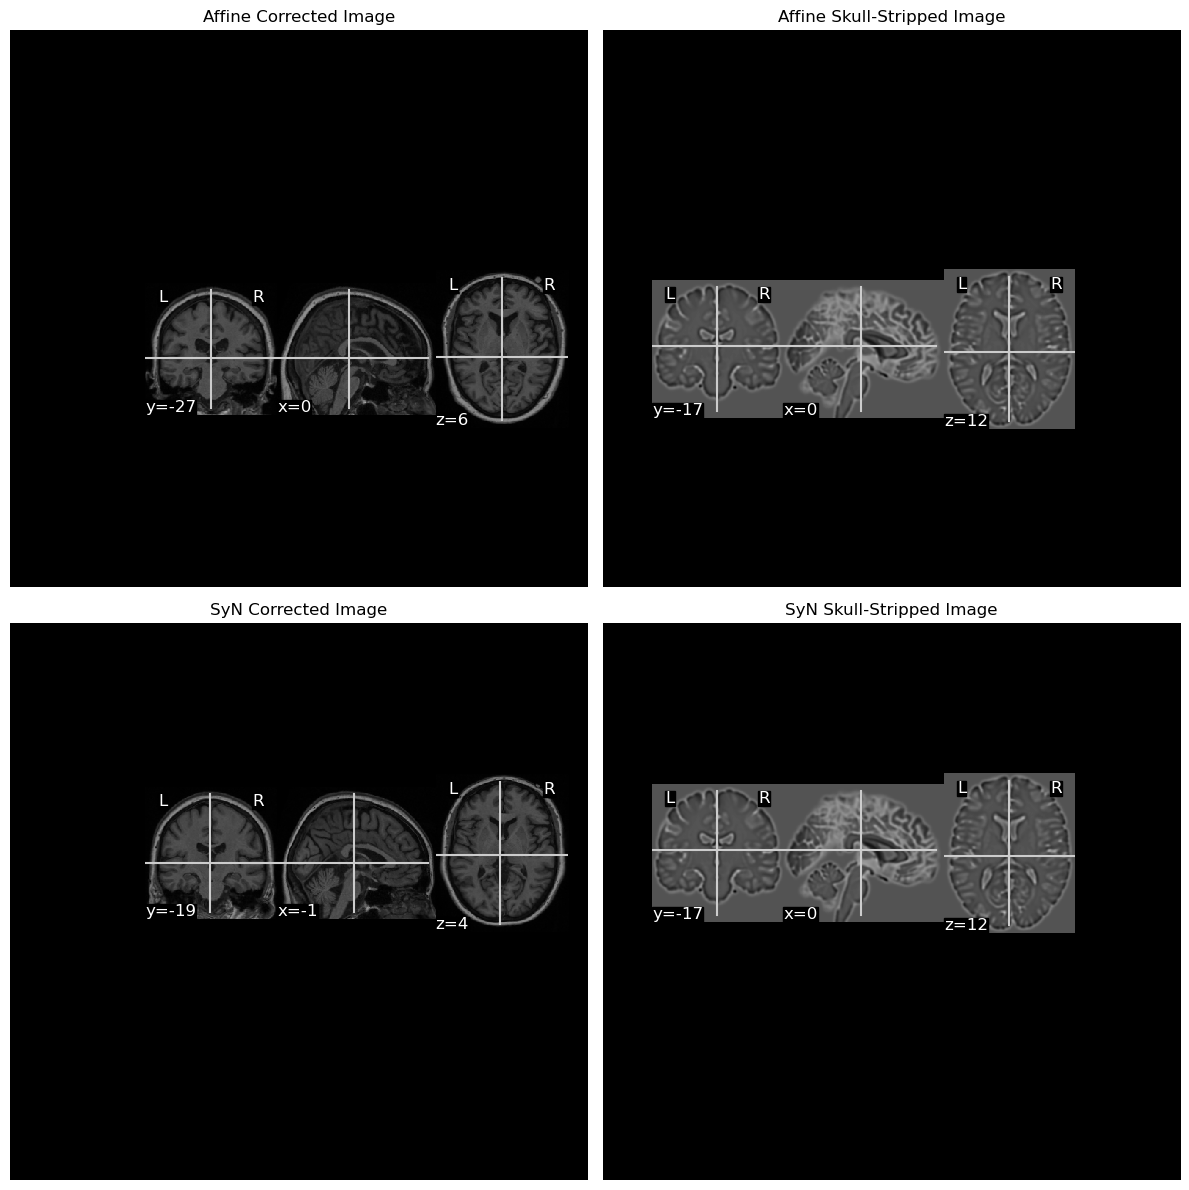

In [12]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt

# Specify the paths to the corrected images
affine_corrected_path = "affine_corrected_image.nii.gz"
syn_corrected_path = "syn_corrected_image.nii.gz"

# Specify the paths to the skull-stripped images
affine_skull_stripped_path ="affine_skull_stripped_brainBrainExtractionTemplateLaplacian.nii.gz"
syn_skull_stripped_path = "syn_skull_stripped_brainBrainExtractionTemplateLaplacian.nii.gz"

# Load the corrected and skull-stripped images
affine_corrected_image = nib.load(affine_corrected_path)
syn_corrected_image = nib.load(syn_corrected_path)
affine_skull_stripped_image = nib.load(affine_skull_stripped_path)
syn_skull_stripped_image = nib.load(syn_skull_stripped_path)

# Display images side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Affine corrected image
plotting.plot_anat(affine_corrected_image, display_mode='ortho', cut_coords=None, axes=axes[0, 0])
axes[0, 0].set_title('Affine Corrected Image')

# Affine skull-stripped image
plotting.plot_anat(affine_skull_stripped_image, display_mode='ortho', cut_coords=None, axes=axes[0, 1])
axes[0, 1].set_title('Affine Skull-Stripped Image')

# SyN corrected image
plotting.plot_anat(syn_corrected_image, display_mode='ortho', cut_coords=None, axes=axes[1, 0])
axes[1, 0].set_title('SyN Corrected Image')

# SyN skull-stripped image
plotting.plot_anat(syn_skull_stripped_image, display_mode='ortho', cut_coords=None, axes=axes[1, 1])
axes[1, 1].set_title('SyN Skull-Stripped Image')

plt.tight_layout()
plt.show()
